***Tasks:
Load the dataset and perform data cleaning.


Perform EDA using visualizations (use seaborn, matplotlib).


Predict whether a student will pass or fail based on scores and other features.


Use Logistic Regression or Random Forest for classification.


Evaluate the model using accuracy, confusion matrix, F1-score.


Add comments/markdown to explain the steps.***


In [82]:
#import the necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [69]:
#Step1 a: Load the dataset

df = pd.read_csv(r'C:\Users\USER\Guvi python\Cuvette\StudentsPerformance.csv')
#df = pd.read_csv(r'..\Cuvette\StudentsPerformance.csv')

# Initial inspection
print(df.info())
print(df.describe(include='all'))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some colleg

In [71]:
#Step1 b:  perform data cleaning

In [70]:
#Check for null values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [72]:
#Check for duplicates
df.duplicated().sum()

0

In [73]:
# Count of Unique values for each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [74]:
# List of unique values in each categorical feature
print("Gender:",df['gender'].unique())
print("Race/ethinicity:",df['race/ethnicity'].unique())
print("Parental level of education:",df['parental level of education'].unique())
print("Lunch:",df['lunch'].unique())
print("Test preparation course:",df['test preparation course'].unique())

Gender: ['female' 'male']
Race/ethinicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch: ['standard' 'free/reduced']
Test preparation course: ['none' 'completed']


In [75]:
#Feature Engineering to include labels in the df
df['average'] = (df['math score']+df['reading score']+df['writing score'])/3
# Function to check the conditions
def check_status(row):
    subject_marks_above_40 = sum(row[['math score', 'reading score', 'writing score']] > 40)
    if row['average'] > 40 and subject_marks_above_40 >= 3:
        return 'Passed'
    else:
        return 'Failed'

# Apply the function to determine the 'status'
df['status'] = df.apply(check_status, axis=1)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,status
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Passed
1,female,group C,some college,standard,completed,69,90,88,82.333333,Passed
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Passed
4,male,group C,some college,standard,none,76,78,75,76.333333,Passed


In [76]:
df.columns[0:7]

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score'],
      dtype='object')

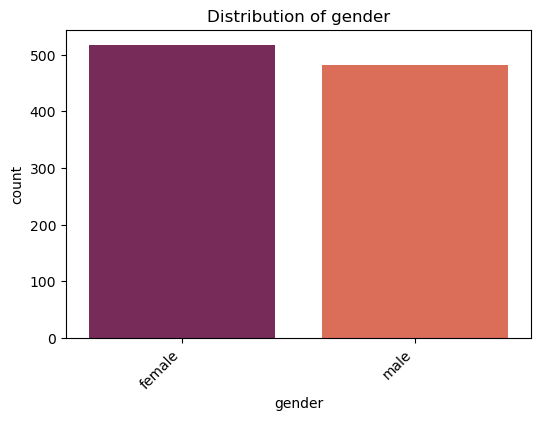

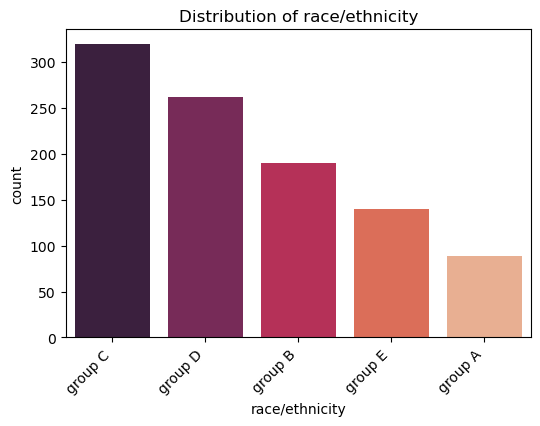

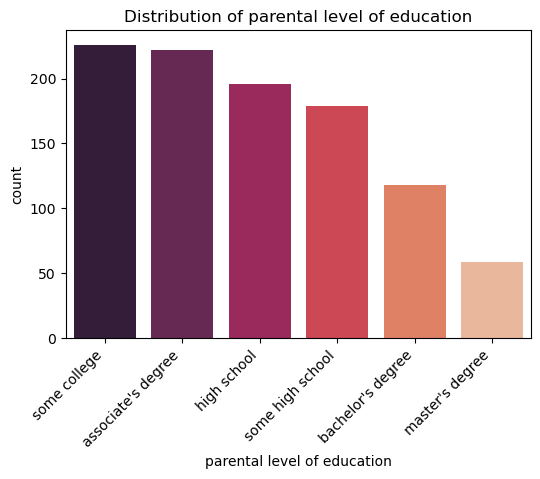

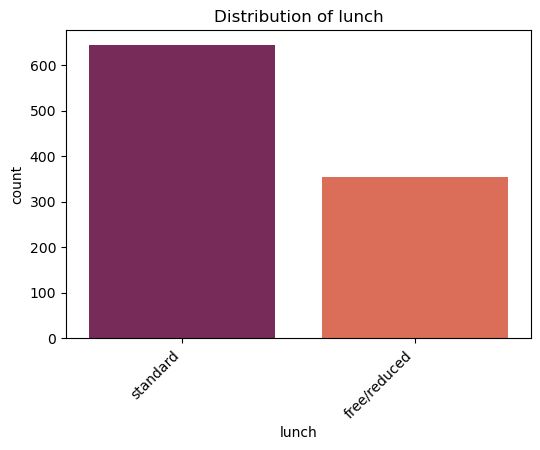

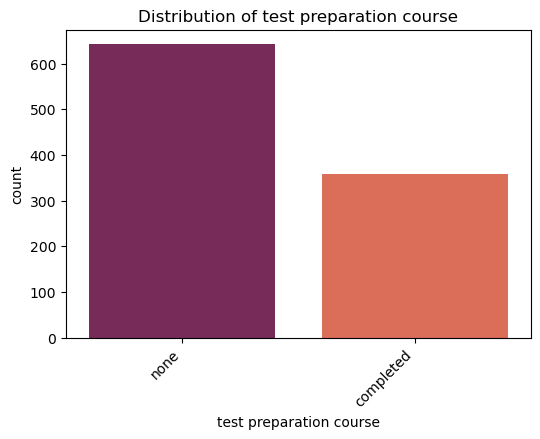

In [77]:
#Step 2:Perform EDA using visualizations (use seaborn, matplotlib)
#Univariate analysis- categorical columns
for column in df.columns[0:5]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[column], order=df[column].value_counts().index,palette='rocket')
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

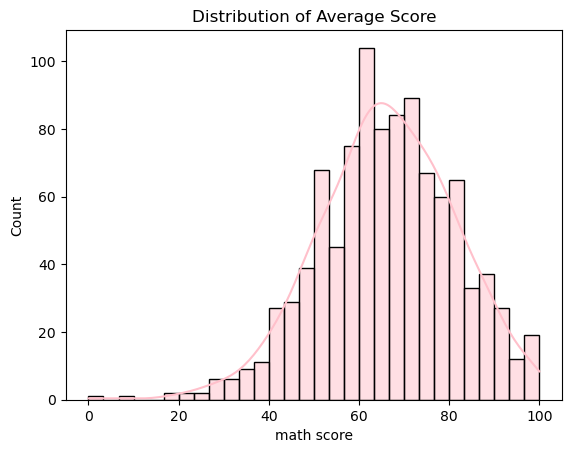

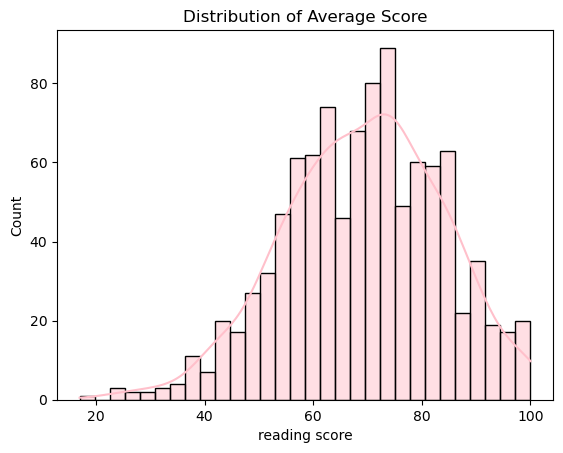

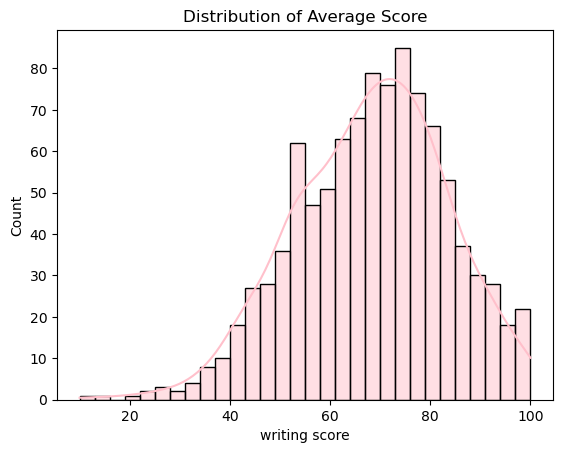

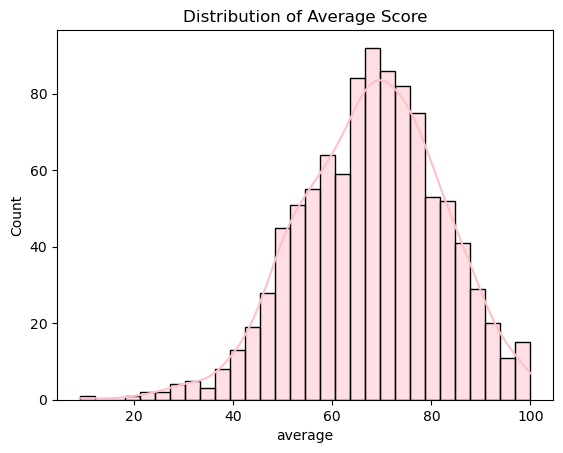

In [78]:
#Univariate analysis- numerical columns
for column in df.columns[5:9]:
    sns.histplot(df[column], kde=True, bins=30, color='pink')
    plt.title("Distribution of Average Score")
    plt.show()

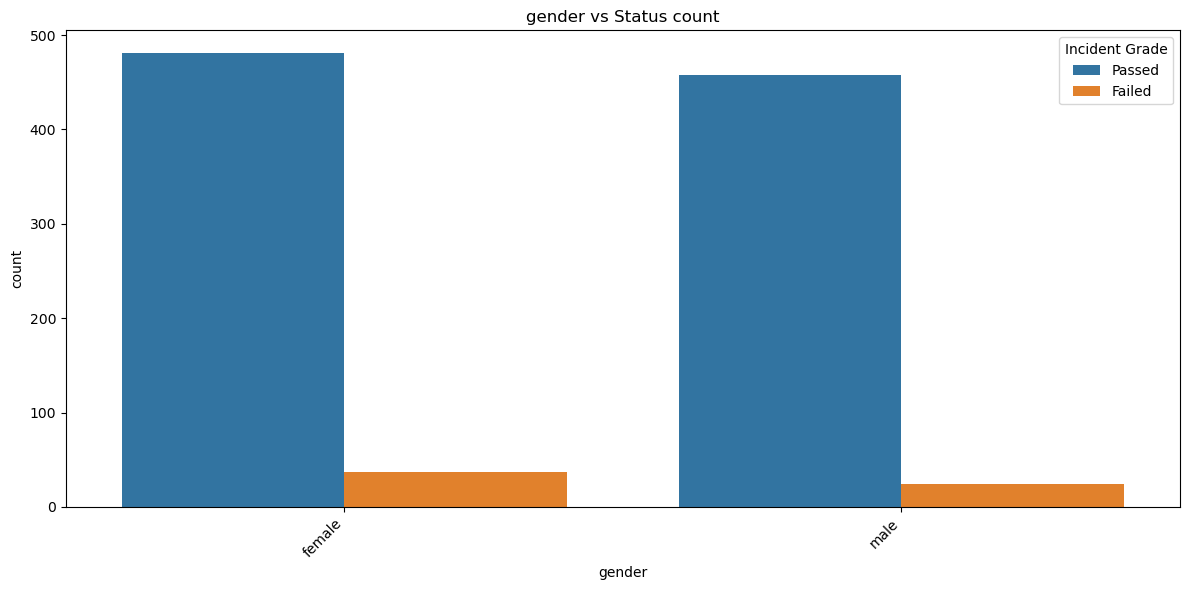

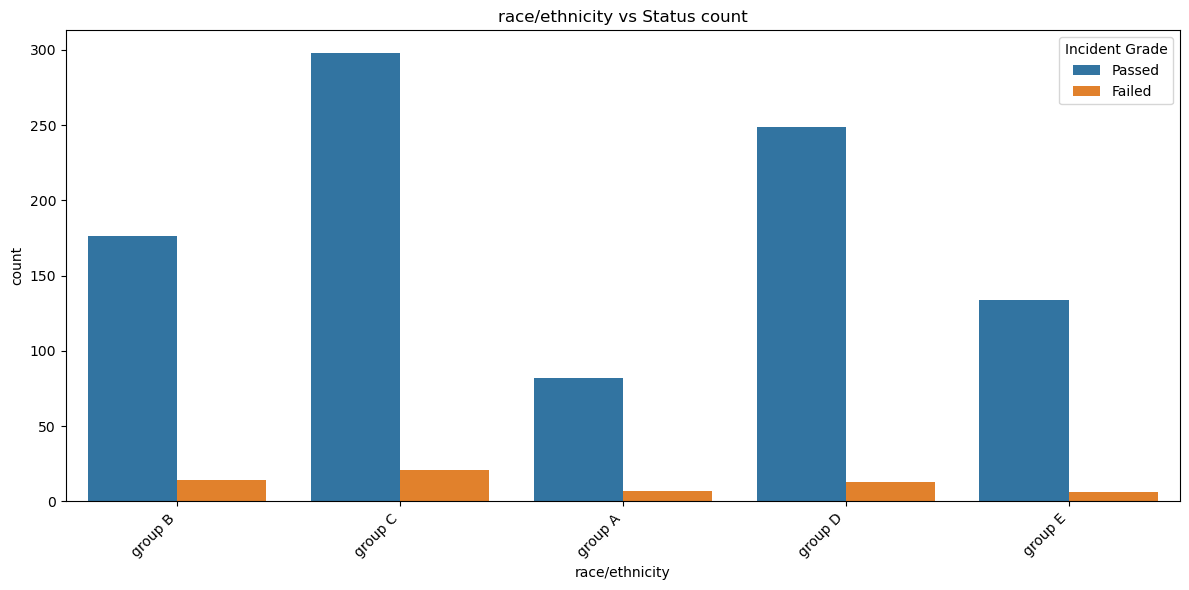

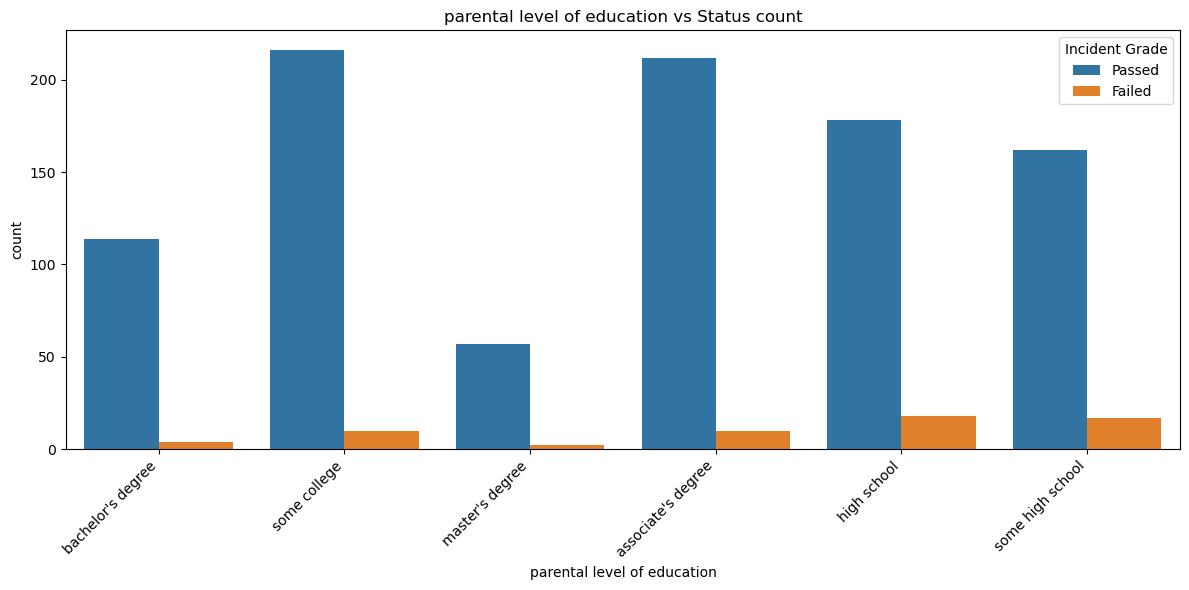

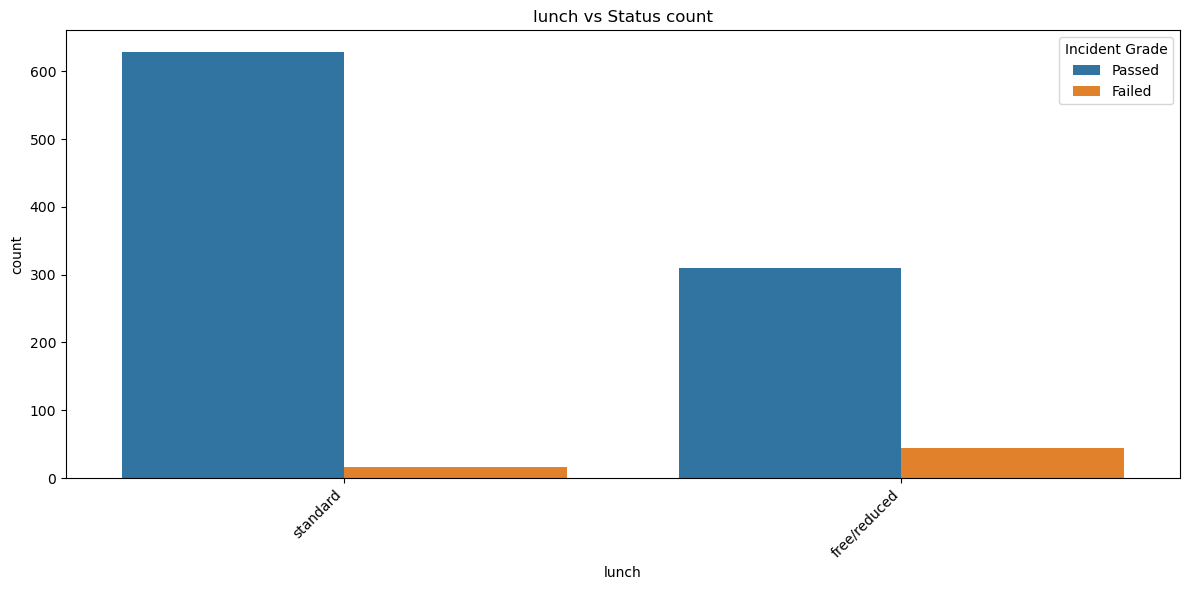

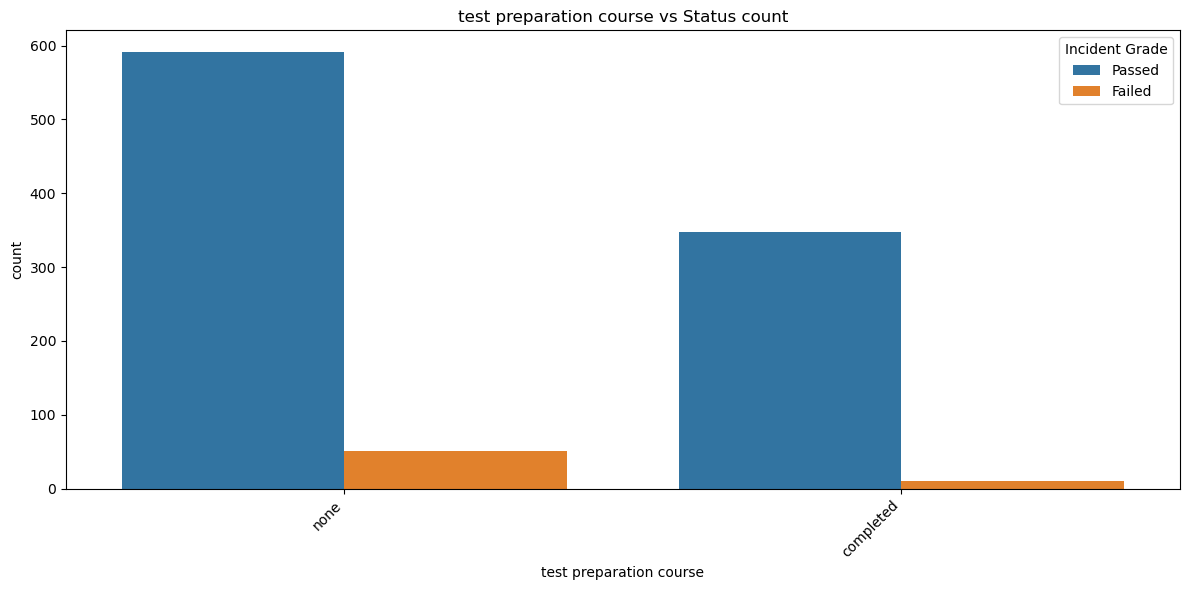

In [79]:
#Bi-variate analysis : columns vs Status of Pass/Fail
for col in df.columns[0:5]:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, hue='status')
    plt.title(f"{col} vs Status count")
    plt.xticks(rotation=45, ha='right')  # Rotate and align ticks
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.legend(title='Incident Grade')
    plt.show()
    


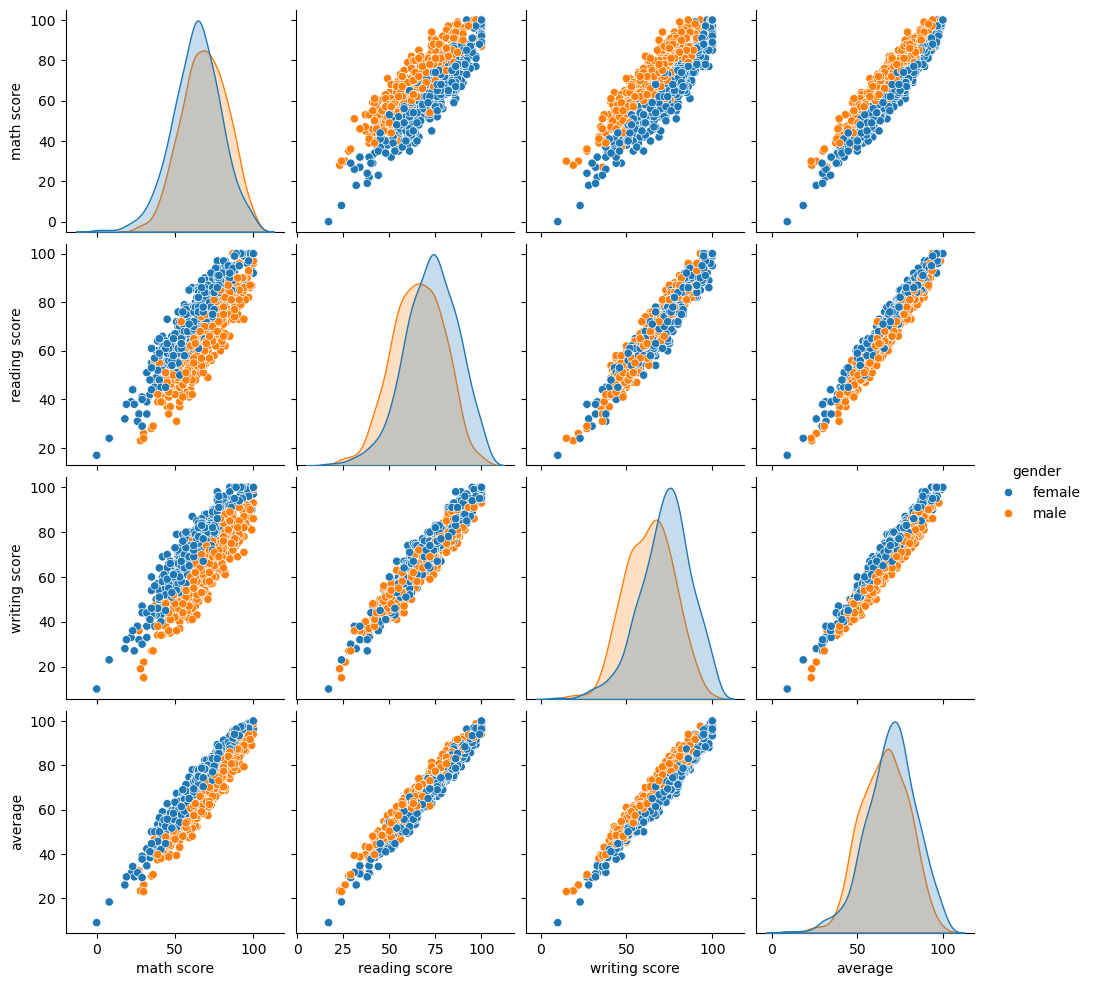

In [80]:
#Numerical columns vs Average score
sns.pairplot(df, hue='gender', diag_kind='kde')
plt.show()

In [81]:
#Step 3: Predict whether a student will pass or fail based on scores and other features.
#Encode categorical columns
df = pd.get_dummies(df, columns=df.columns[df.dtypes == 'object'],dtype='int8',drop_first=True)
df.head(10)

,math score,reading score,writing score,average,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,status_Passed
0,72,72,74,72.666667,0,1,0,0,0,1,0,0,0,0,1,1,1
1,69,90,88,82.333333,0,0,1,0,0,0,0,0,1,0,1,0,1
2,90,95,93,92.666667,0,1,0,0,0,0,0,1,0,0,1,1,1
3,47,57,44,49.333333,1,0,0,0,0,0,0,0,0,0,0,1,1
4,76,78,75,76.333333,1,0,1,0,0,0,0,0,1,0,1,1,1
5,71,83,78,77.333333,0,1,0,0,0,0,0,0,0,0,1,1,1
6,88,95,92,91.666667,0,1,0,0,0,0,0,0,1,0,1,0,1
7,40,43,39,40.666667,1,1,0,0,0,0,0,0,1,0,0,1,0
8,64,64,67,65.000000,1,0,0,1,0,0,1,0,0,0,0,0,1
9,38,60,50,49.333333,0,1,0,0,0,0,1,0,0,0,0,1,0


LogisticRegression
Cross validation score:[0.97  0.97  0.995 0.98  0.985]
*******Train******
Accuracy: 0.98625
Precision: 0.9718175128771156
Recall : 0.9121246400658165
F1 Score: 0.9396396211014397


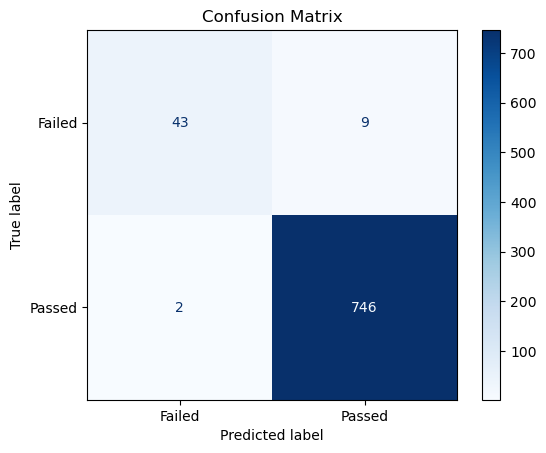

*******Test******
Accuracy: 0.98
Precision: 0.883653286794648
Recall : 0.883653286794648
F1 Score: 0.883653286794648


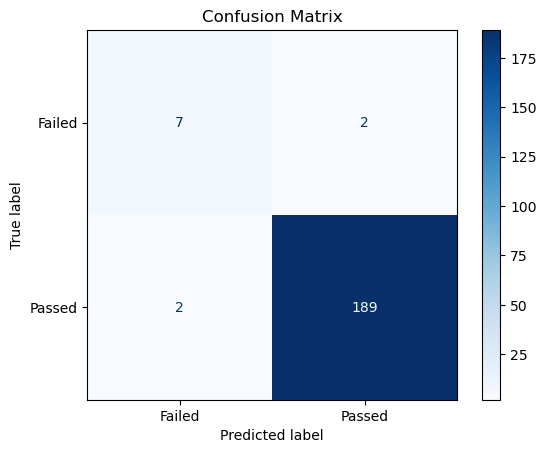

In [86]:
#Step 4: Use Logistic Regression for classification


def train_metrics(y_train,train_pred):
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred,average='macro')}")
    print(f"Recall : {recall_score(y_train,train_pred,average='macro')}")
    print(f"F1 Score: {f1_score(y_train,train_pred,average='macro')}")
    # Calculate the confusion matrix
    cm = confusion_matrix(y_train, train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Failed','Passed'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    return


#Splitting the target data column
X = df.drop(columns=['status_Passed'],axis=1)  # Drop output column 
y = df['status_Passed']

#Train-Validation Split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)

model=LogisticRegression()

print(type(model).__name__)
model.fit(x_train,y_train)

cvs=cross_val_score(model,X,y,cv=5)
print(f"Cross validation score:{cvs}")

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print("*******Train******")
train_metrics(y_train,train_pred)

print("*******Test******")
train_metrics(y_test,test_pred)
